In [1]:
# Import necessary libraries
from services import download, unzip
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LTA_COE_BIDDING_RESULT = "https://datamall.lta.gov.sg/content/dam/datamall/datasets/Facts_Figures/Vehicle%20Registration/COE%20Bidding%20Results.zip"

# Download and unzip the dataset
zip_file_path = download(LTA_COE_BIDDING_RESULT, "/data")
csv_file_pattern = "*-coe_results.csv"
data = unzip(zip_file_path, csv_file_pattern)

In [3]:
# Convert 'month' to datetime and filter data for the specified years
data['month'] = pd.to_datetime(data['month'])
filtered_data = data[(data['month'].dt.year >= 2014) & (data['month'].dt.year <= 2024)]

# Clean 'bids_received' column, replace commas and convert to integer
filtered_data.loc[:, 'bids_received'] = filtered_data['bids_received'].str.replace(',', '').astype(int)

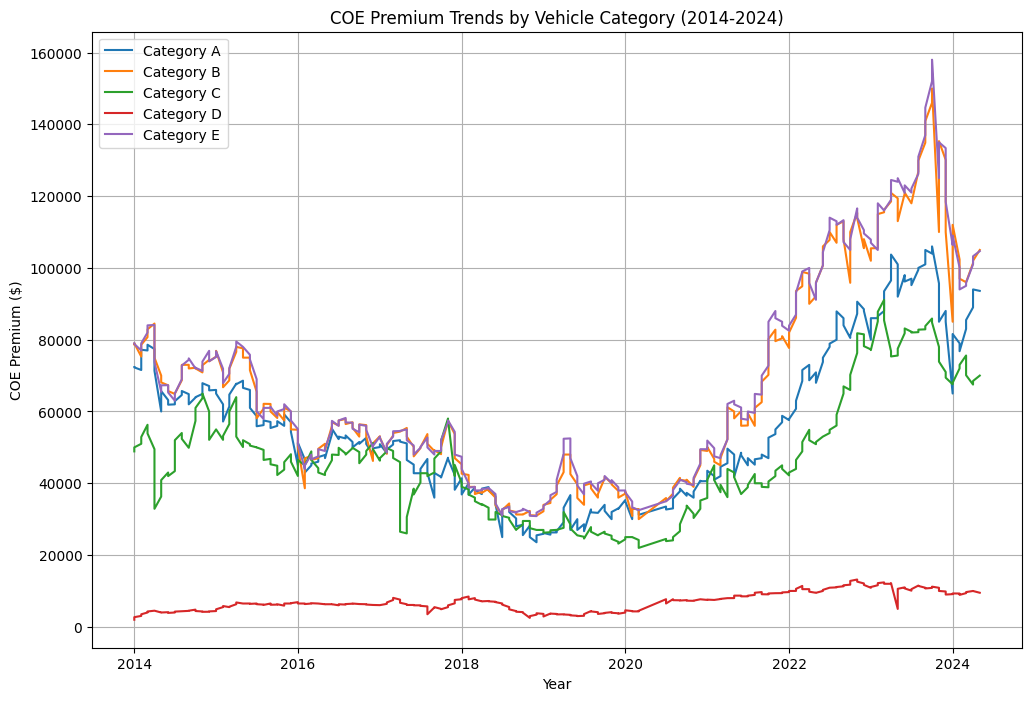

In [4]:
# Plotting COE premiums over time for each vehicle category
categories = filtered_data['vehicle_class'].unique()
plt.figure(figsize=(12, 8))

for category in categories:
    category_data = filtered_data[filtered_data['vehicle_class'] == category]
    plt.plot(category_data['month'], category_data['premium'], label=f'Category {category[-1]}')

plt.title('COE Premium Trends by Vehicle Category (2014-2024)')
plt.xlabel('Year')
plt.ylabel('COE Premium ($)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/55/_gry9f7j53bcysg2y87yrh8r0000gn/T/ipykernel_63709/2898305835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['month'].dt.year
/var/folders/55/_gry9f7j53bcysg2y87yrh8r0000gn/T/ipykernel_63709/2898305835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month_name'] = filtered_data['month'].dt.month_name()


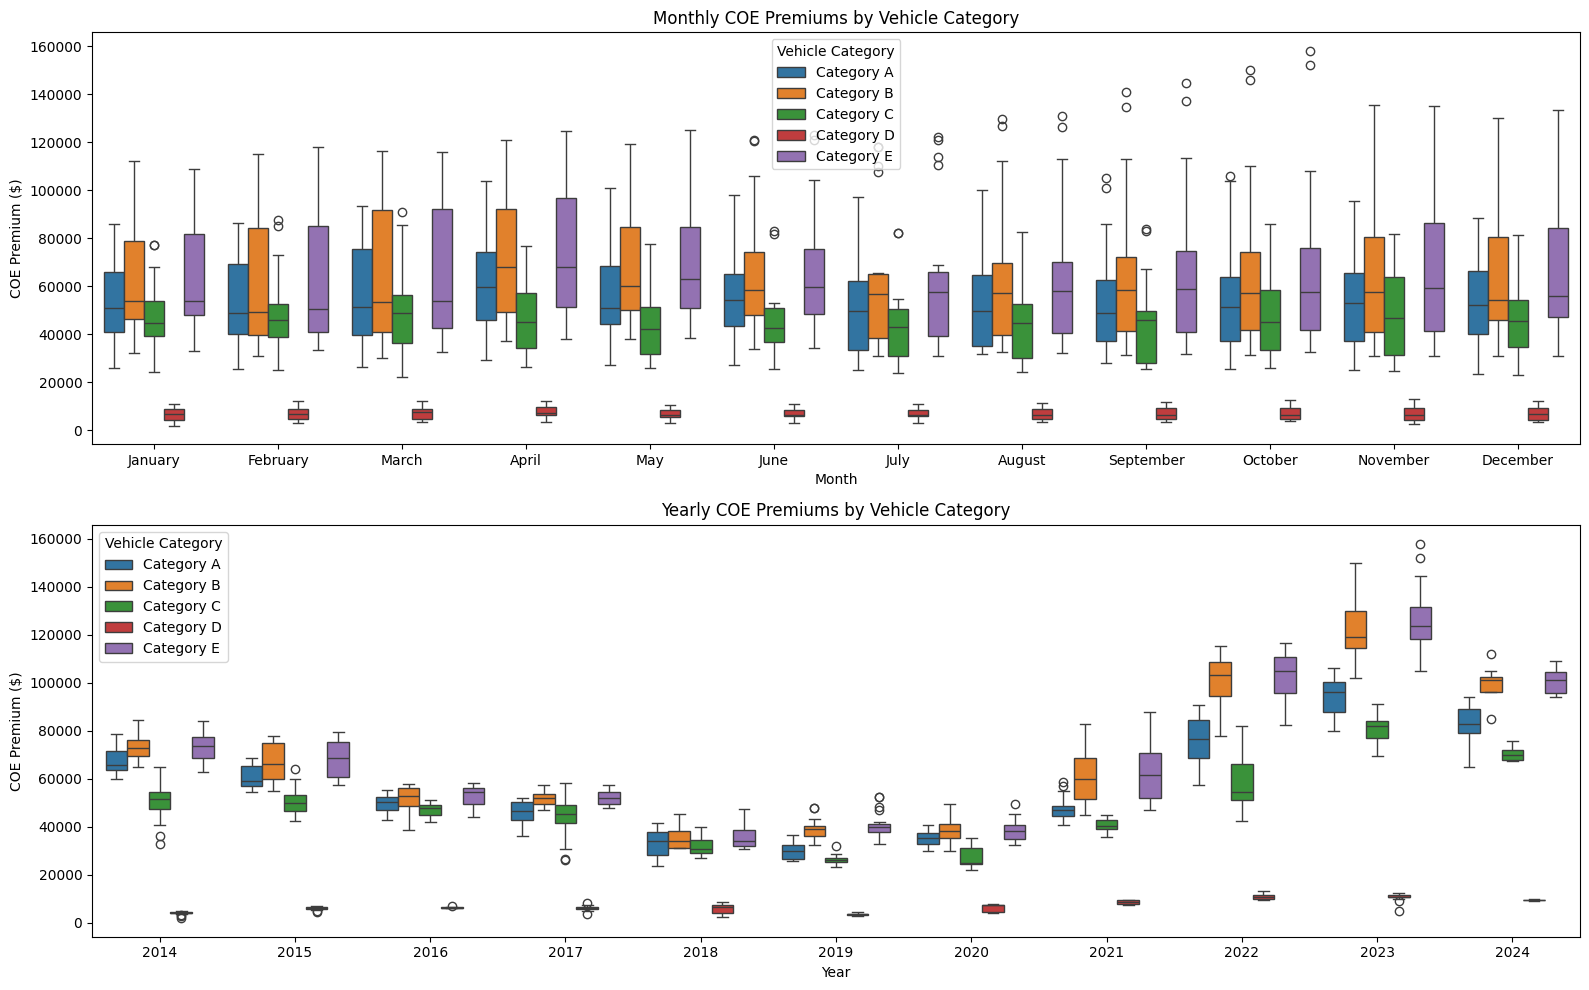

In [5]:
import seaborn as sns

# Extract month and year from 'month' for seasonal analysis
filtered_data['year'] = filtered_data['month'].dt.year
filtered_data['month_name'] = filtered_data['month'].dt.month_name()

# Create box plots for each category by month and year
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=filtered_data, x='month_name', y='premium', hue='vehicle_class')
plt.title('Monthly COE Premiums by Vehicle Category')
plt.xlabel('Month')
plt.ylabel('COE Premium ($)')
plt.legend(title='Vehicle Category')

plt.subplot(2, 1, 2)
sns.boxplot(data=filtered_data, x='year', y='premium', hue='vehicle_class')
plt.title('Yearly COE Premiums by Vehicle Category')
plt.xlabel('Year')
plt.ylabel('COE Premium ($)')
plt.legend(title='Vehicle Category')
plt.tight_layout()
plt.show()

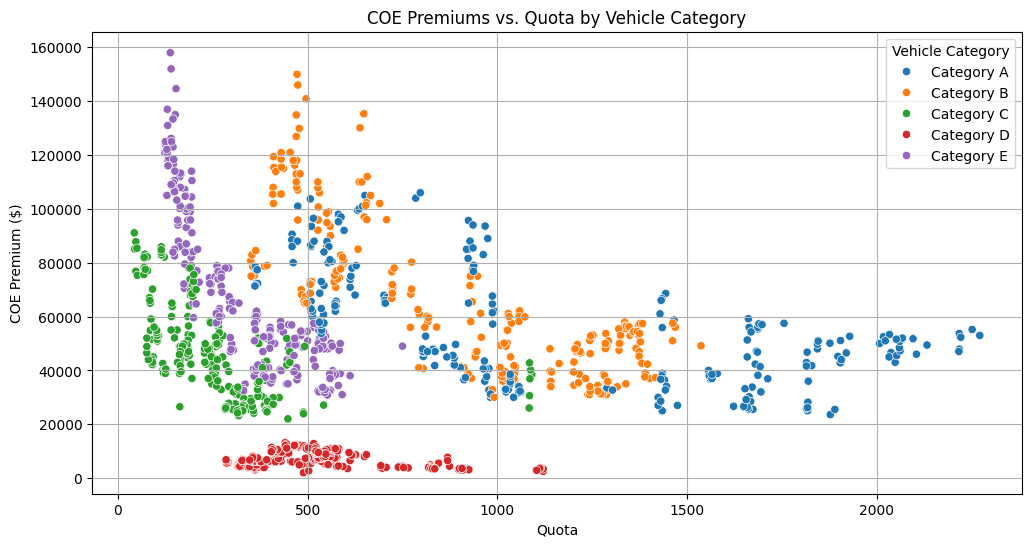

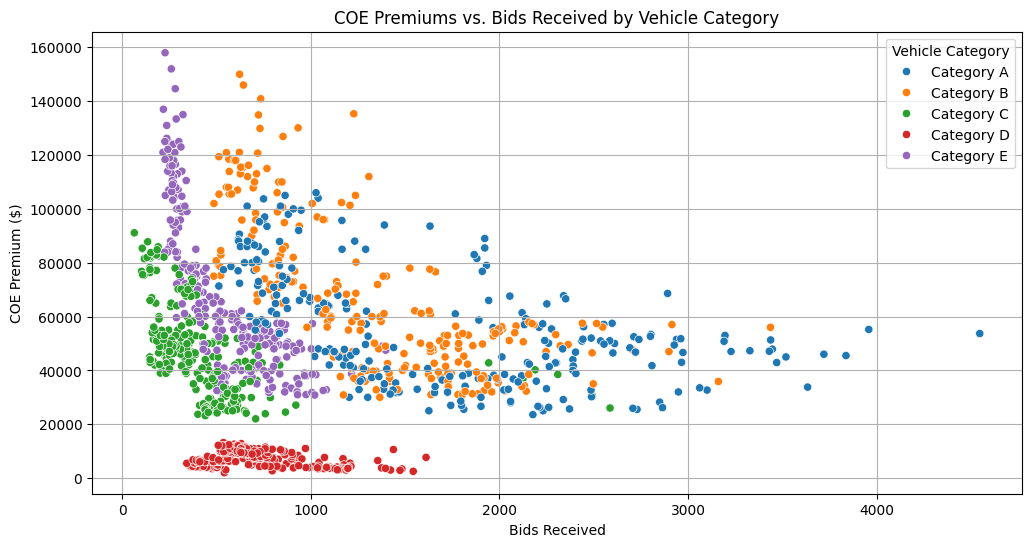

Correlation Coefficients:
                 premium     quota  bids_received
premium        1.000000 -0.149765      -0.112631
quota         -0.149765  1.000000       0.957955
bids_received -0.112631  0.957955       1.000000


In [6]:
# Scatter plot for COE premiums vs. quota
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='quota', y='premium', hue='vehicle_class')
plt.title('COE Premiums vs. Quota by Vehicle Category')
plt.xlabel('Quota')
plt.ylabel('COE Premium ($)')
plt.legend(title='Vehicle Category')
plt.grid(True)
plt.show()

# Scatter plot for COE premiums vs. bids received
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='bids_received', y='premium', hue='vehicle_class')
plt.title('COE Premiums vs. Bids Received by Vehicle Category')
plt.xlabel('Bids Received')
plt.ylabel('COE Premium ($)')
plt.legend(title='Vehicle Category')
plt.grid(True)
plt.show()

# Calculating correlation coefficients
correlation_data = filtered_data[['premium', 'quota', 'bids_received']].corr()
print("Correlation Coefficients:\n", correlation_data)

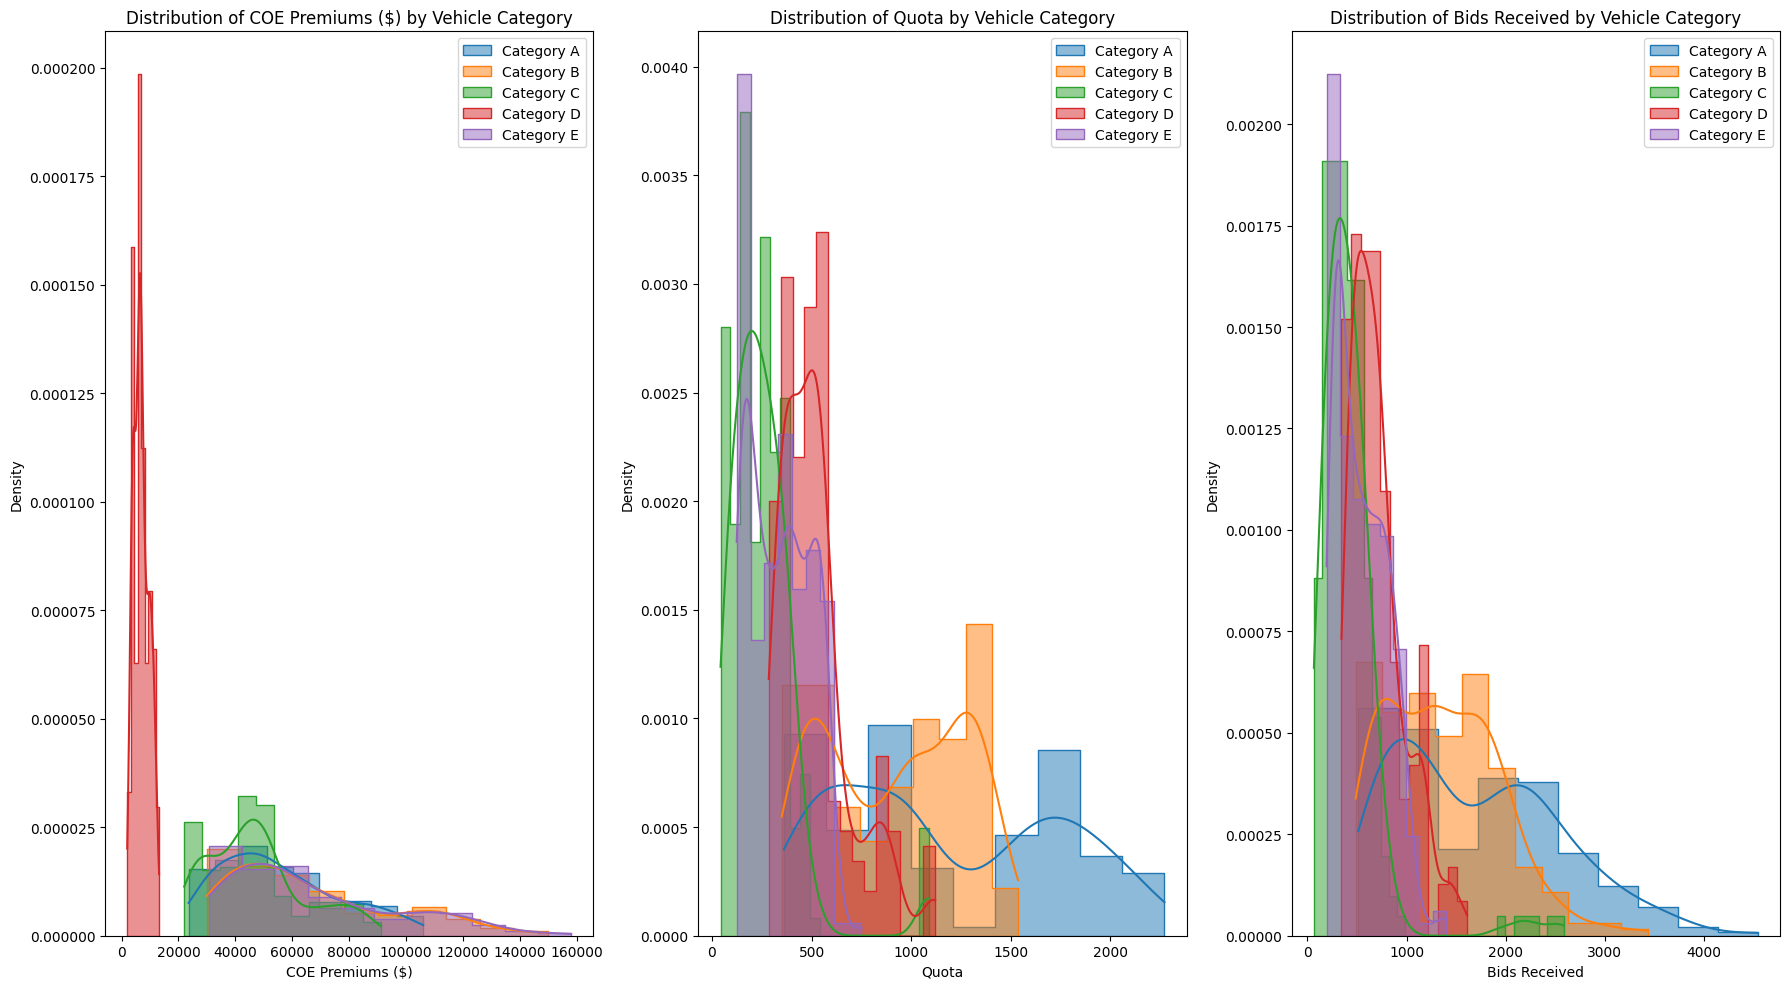

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure
plt.figure(figsize=(18, 10))

# Creating a list of categories and variable names for looping
categories = filtered_data['vehicle_class'].unique()
variables = ['premium', 'quota', 'bids_received']
titles = ['COE Premiums ($)', 'Quota', 'Bids Received']

# Plotting histograms with KDE for each variable by category
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    for category in categories:
        sns.histplot(data=filtered_data[filtered_data['vehicle_class'] == category], x=var, kde=True, label=f'Category {category[-1]}', element='step', stat="density")
    plt.title(f'Distribution of {titles[i]} by Vehicle Category')
    plt.xlabel(titles[i])
    plt.legend()

plt.tight_layout()
plt.show()